<a href="https://colab.research.google.com/github/linhgiangpham99/TPPQ1/blob/main/TP_PQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from numpy import linalg
from math import sin, pi, sqrt, exp

In [17]:
def kronecker(n,m): #function defines Kronecker symbol
  if n==m:
    return 1
  else:
    return 0
def v_OH (R,x):
  return (pi**2)*(R**2)*((x-1/2)**2)/4

def function1(x,n,m,R):
  return sin(n*pi*x)*sin(m*pi*x)*v_OH(R,x)

def hamilnorm(n,m,R):
  return n**2*kronecker(n,m)+2*integrate.quad(function1,0,1,args=(n,m,R))[0]
def Hamiltonien(N,R):
  P=np.zeros((N,N))
  for i in range (N):
    for j in range (N):
      P[i,j]=hamilnorm(i+1,j+1,R)
  return P


In [18]:
R=24
N=50

In [19]:
H=Hamiltonien(N,R)


In [20]:
H1=Hamiltonien(N,R) #arrondir à 0 pour les valeurs négligeables
for i in range(N):
  for j in range (N):
    if H1[i,j] <(10e-6):
      H1[i,j]=0


In [22]:
print(H1)

[[4.74352528e+01 0.00000000e+00 5.40000000e+01 ... 0.00000000e+00
  9.80000000e-03 0.00000000e+00]
 [0.00000000e+00 1.04435253e+02 0.00000000e+00 ... 2.09058601e-02
  0.00000000e+00 1.84911243e-02]
 [5.40000000e+01 0.00000000e+00 1.19435253e+02 ... 0.00000000e+00
  2.95969844e-02 0.00000000e+00]
 ...
 [0.00000000e+00 2.09058601e-02 0.00000000e+00 ... 2.42240400e+03
  0.00000000e+00 7.19700125e+01]
 [9.80000000e-03 0.00000000e+00 2.95969844e-02 ... 0.00000000e+00
  2.51940527e+03 0.00000000e+00]
 [0.00000000e+00 1.84911243e-02 0.00000000e+00 ... 7.19700125e+01
  0.00000000e+00 2.61840645e+03]]


In [23]:
def energynorm(R,N): #energie normalisée
  P=Hamiltonien(N,R)
  k=np.size(P,0)
  Unsorted=np.linalg.eig(P)[0]
  C=sorted(Unsorted)
  Indexes=list()
  for i in range (N):
    Indexes.append(C.index(Unsorted[i])) 
    #Indexes.append(Unsorted.index(C[i]))
  K=np.linalg.eig(P)[1]
  return C,K, Indexes
def energy(R,k): 
  energylist=list()
  for i in range (k):
    energylist.append(R*(i-1/2))
  return energylist
def energyquad(R,N):
  P=Hamiltonien(N,R)
  energylist=list()
  def funcquad(n,C):
    return  n**2+C
  popt,pcov=curve_fit(funcquad, [i for i in range(1,np.size(P,0)+1)], energynorm(R,N)[0][0:np.size(P,0)+1])
  for i in range (N):
    energylist.append((i)**2+popt)
  return energylist

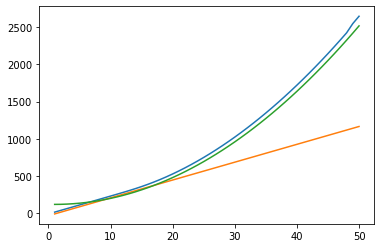

In [24]:
C,K,D= energynorm(R,N)
#print(C)
plt.plot([i for i in range(1,N+1)],C)
E=energy(R,N)
#print(E)
plt.plot([i for i in range(1,N+1)],E)
F=energyquad(R,N)
plt.plot([i for i in range(1,N+1)],F)


In [25]:
def prodscar(A,B): #produit scalaire
  p=0
  n=np.size(A)
  #print(n)
  for i in range (n):
    p+=A[i]*B[i]
  return p

In [26]:
def vectorprop(R,N,a,k): #extraire le vecteur propre pour un k distinct
  indexes= energynorm(R,N)[2]
  n=indexes[k]
  vectorlist_k=list()
  vectorprop1=energynorm(R,N)[1]
  for i in range(N):
    vectorlist_k.append(vectorprop1[i,n])
  #vectorlist_k.append(vectorprop1[:,n])
  #print(np.shape(vectorlist_k),vectorlist_k)
  return vectorlist_k


In [44]:
#def fonctionprop(x,n): #fonction phi_n espace dual x
 # return np.sqrt(2)*np.sin(n*np.pi*x)
def foncOH(x,R,a,k):
  if k==0: 
    return exp((-(pi**2)/4)*R*((x/a-1/2)**2))*((pi)/(2*a**2)*R)**(1/4)
  if k==1:
    return exp((-(pi**2)/4)*R*((x/a-1/2)**2))*((pi**5)/(2*a**2)*R**3)**(1/4)*(x/a-1/2)
  if k==2:
    return exp((-(pi**2)/4)*R*((x/a-1/2)**2))*(pi**2*R*((x/a-1/2)**2)-1)*((pi)/(8*a**2)*R)**(1/4)
def vectorfoncOH(R,a,k,step):
  t1 = np.linspace(0, a, step)
  Y = [foncOH(x,R,a,k) for x in t1]
  return Y
def bra(x,N): # vecteur de la fonction d'onde
  L=np.zeros(N)
  for i in range(N):
    #L[i]=(fonctionprop(x,(i+1))) #i+1?
    L[i]=sqrt(2)*sin((i+1)*pi*x)
  return L
def Psi(R,N,a,step,k=0): #k=> choisi n=0,1,2.... # create all the states of the ondular function of a certain level of energy (k)
  vectorproplist=vectorprop(R,N,a,k)
  vectorlist=np.zeros(step)
  t1 = np.linspace(0, a, step)
  for j in range (step):
    vectorlist[j]= prodscar(vectorproplist,bra(t1[j],N))
  return vectorlist




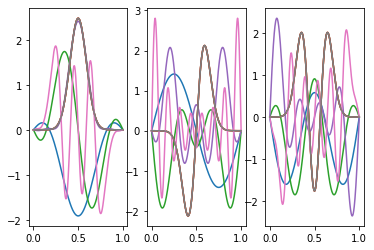

In [56]:
#plot all the Ns and compared with the analyzed function in the topic
a=1
N=[3,5,8,15]
step= 500
R=24
k=3 #3 niveaux d'énergie
fig,axs=plt.subplots(1,k)
for j in range (len(N)):
  for i in range(k):
    vector=Psi(R,N[j],a,step,i)
    t1 = np.linspace(0, a, step)
    axs[i].plot(t1, vector)
    K= [foncOH(x,R,a,i) for x in t1]
    #print(i,np.shape(vectorfoncOH(R,a,i,step)))
    axs[i].plot(t1, K)